# Imporing Libraries

In [44]:
import pandas as pd

In [46]:
import numpy as np

In [47]:
import matplotlib.pyplot as plt

In [48]:
import matplotlib.cm as cm

# Code

In [50]:
df = pd.read_csv(r"C:\Users\Harsh mishra\Desktop\solarFarm\data\solar irradiance own dataset\compiled solar irradiance India.csv")
df.head()

States   Latitude  Longitude   Jan   Feb   Mar   Apr  \
0  ANDAMAN AND NICOBAR      11.667026  92.735983  5.06  5.88  6.23  6.20   
1      ANDHRA PRADESH       14.750429  78.570026  5.07  5.93  6.35  6.62   
2    ARUNACHAL PRADESH      27.100399  93.616601  3.05  3.10  3.32  3.35   
3                ASSAM      26.749981  94.216667  3.61  4.22  4.69  4.59   
4                BIHAR      25.785414  87.479973  3.15  4.35  5.39  5.77   

    May   Jun   Jul   Aug  Sept   Oct   Nov   Dec    Annual  
0  4.62  4.22  4.31  4.39  4.44  4.92  4.70  4.60  4.964167  
1  6.27  5.36  4.71  4.76  4.99  4.86  4.53  4.42  5.322500  
2  3.72  3.56  3.70  3.97  3.59  3.85  3.53  3.13  3.489167  
3  4.67  4.47  4.31  4.40  4.29  4.22  3.99  3.60  4.255000  
4  5.67  4.90  4.33  4.45  4.37  4.49  4.01  3.19  4.505833

In [52]:
df = df.dropna()
df.tail()

States   Latitude  Longitude   Jan   Feb   Mar   Apr   May  \
28    TAMIL NADU       12.920386  79.150042  4.91  5.76  6.18  6.37  5.93   
29        TRIPURA      23.835404  91.279999  4.01  4.94  5.36  5.38  5.05   
30  UTTAR PRADESH      27.599981  78.050006  2.99  4.44  5.72  6.39  6.59   
31    UTTARANCHAL      30.320409  78.050006  3.39  4.18  5.41  6.20  6.84   
32   WEST BENGAL       22.580390  88.329947  3.65  4.64  5.29  5.73  5.60   

     Jun   Jul   Aug  Sept   Oct   Nov   Dec    Annual  
28  5.42  5.03  5.13  5.22  4.69  4.17  4.14  5.245833  
29  4.36  4.39  4.51  4.44  4.52  4.42  3.85  4.602500  
30  5.89  4.74  4.68  4.89  4.66  3.58  3.00  4.797500  
31  6.14  4.66  4.49  4.95  5.20  4.20  3.56  4.935000  
32  4.42  4.10  4.02  4.22  4.31  3.98  3.47  4.452500

In [53]:
df_sorted_annual = df.sort_values(by = 'Annual')
df_sorted_annual.head()

States   Latitude  Longitude   Jan   Feb   Mar   Apr   May  \
2   ARUNACHAL PRADESH      27.100399  93.616601  3.05  3.10  3.32  3.35  3.72   
27             SIKKIM      27.333330  88.616647  3.50  3.89  4.32  4.55  4.45   
22           NAGALAND      25.666998  94.116570  3.84  4.38  4.72  4.62  4.49   
20          MEGHALAYA      25.570492  91.880014  3.72  4.41  5.00  4.96  4.68   
3               ASSAM      26.749981  94.216667  3.61  4.22  4.69  4.59  4.67   

     Jun   Jul   Aug  Sept   Oct   Nov   Dec    Annual  
2   3.56  3.70  3.97  3.59  3.85  3.53  3.13  3.489167  
27  4.12  3.91  3.93  3.66  4.08  3.78  3.54  3.977500  
22  4.08  3.81  4.02  4.09  4.09  4.08  3.70  4.160000  
20  3.88  3.71  3.96  3.83  4.17  4.08  3.68  4.173333  
3   4.47  4.31  4.40  4.29  4.22  3.99  3.60  4.255000

## Plotting of Annual solar irradiance data

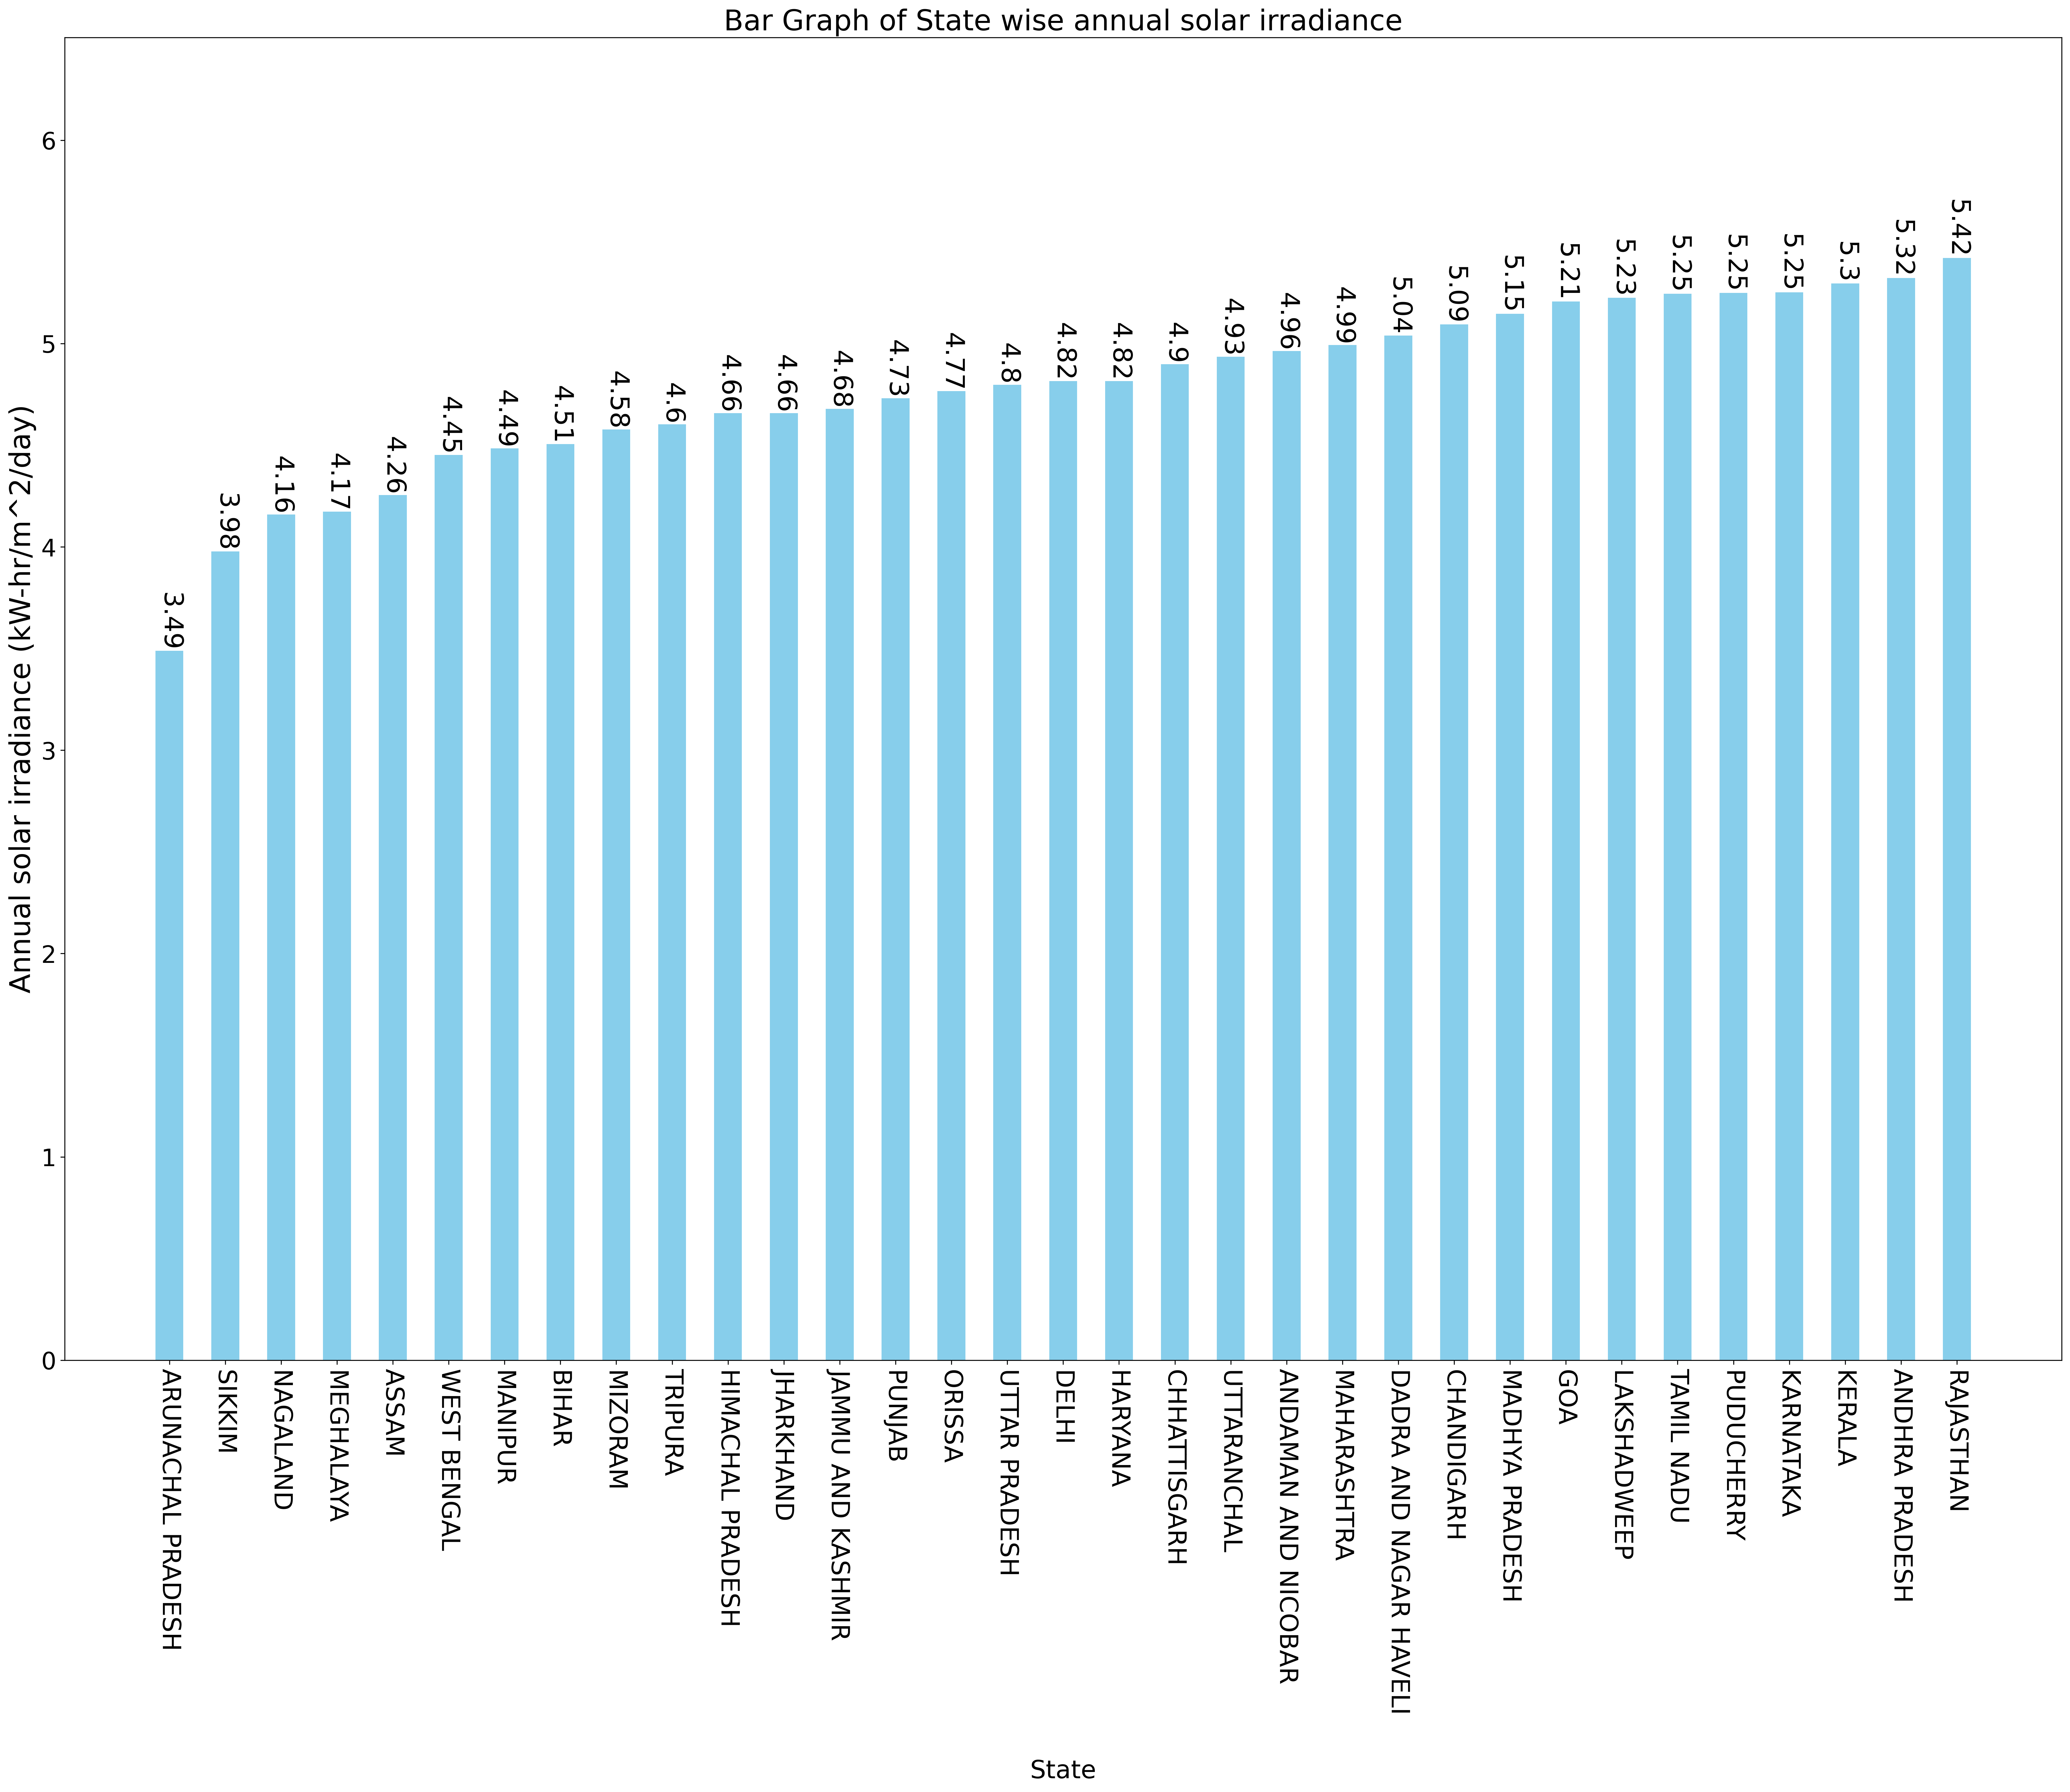

In [54]:

positions = np.arange(len(df_sorted_annual)) * 2

fig, ax = plt.subplots(figsize=(30, 20), dpi=300)  # Adjust the figure size as needed
bars = ax.bar(positions, df_sorted_annual['Annual'], color='skyblue', width=1)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', rotation=-90, fontsize=22)



ax.set_xlabel('State', fontsize=21)  # Label for the x-axis
ax.set_ylabel('Annual solar irradiance (kW-hr/m^2/day)', fontsize=24)  # Label for the y-axis
ax.set_title('Bar Graph of State wise annual solar irradiance', fontsize=24)  # Title of the graph
ax.set_ylim(0, max(df_sorted_annual['Annual']) * 1.2)  # Adjust y-axis limits for better visibility
ax.set_xticks(positions)
ax.set_xticklabels(df_sorted_annual['States'], rotation=-90, fontsize=21)
ax.tick_params(axis='y', labelsize=20)

plt.show()

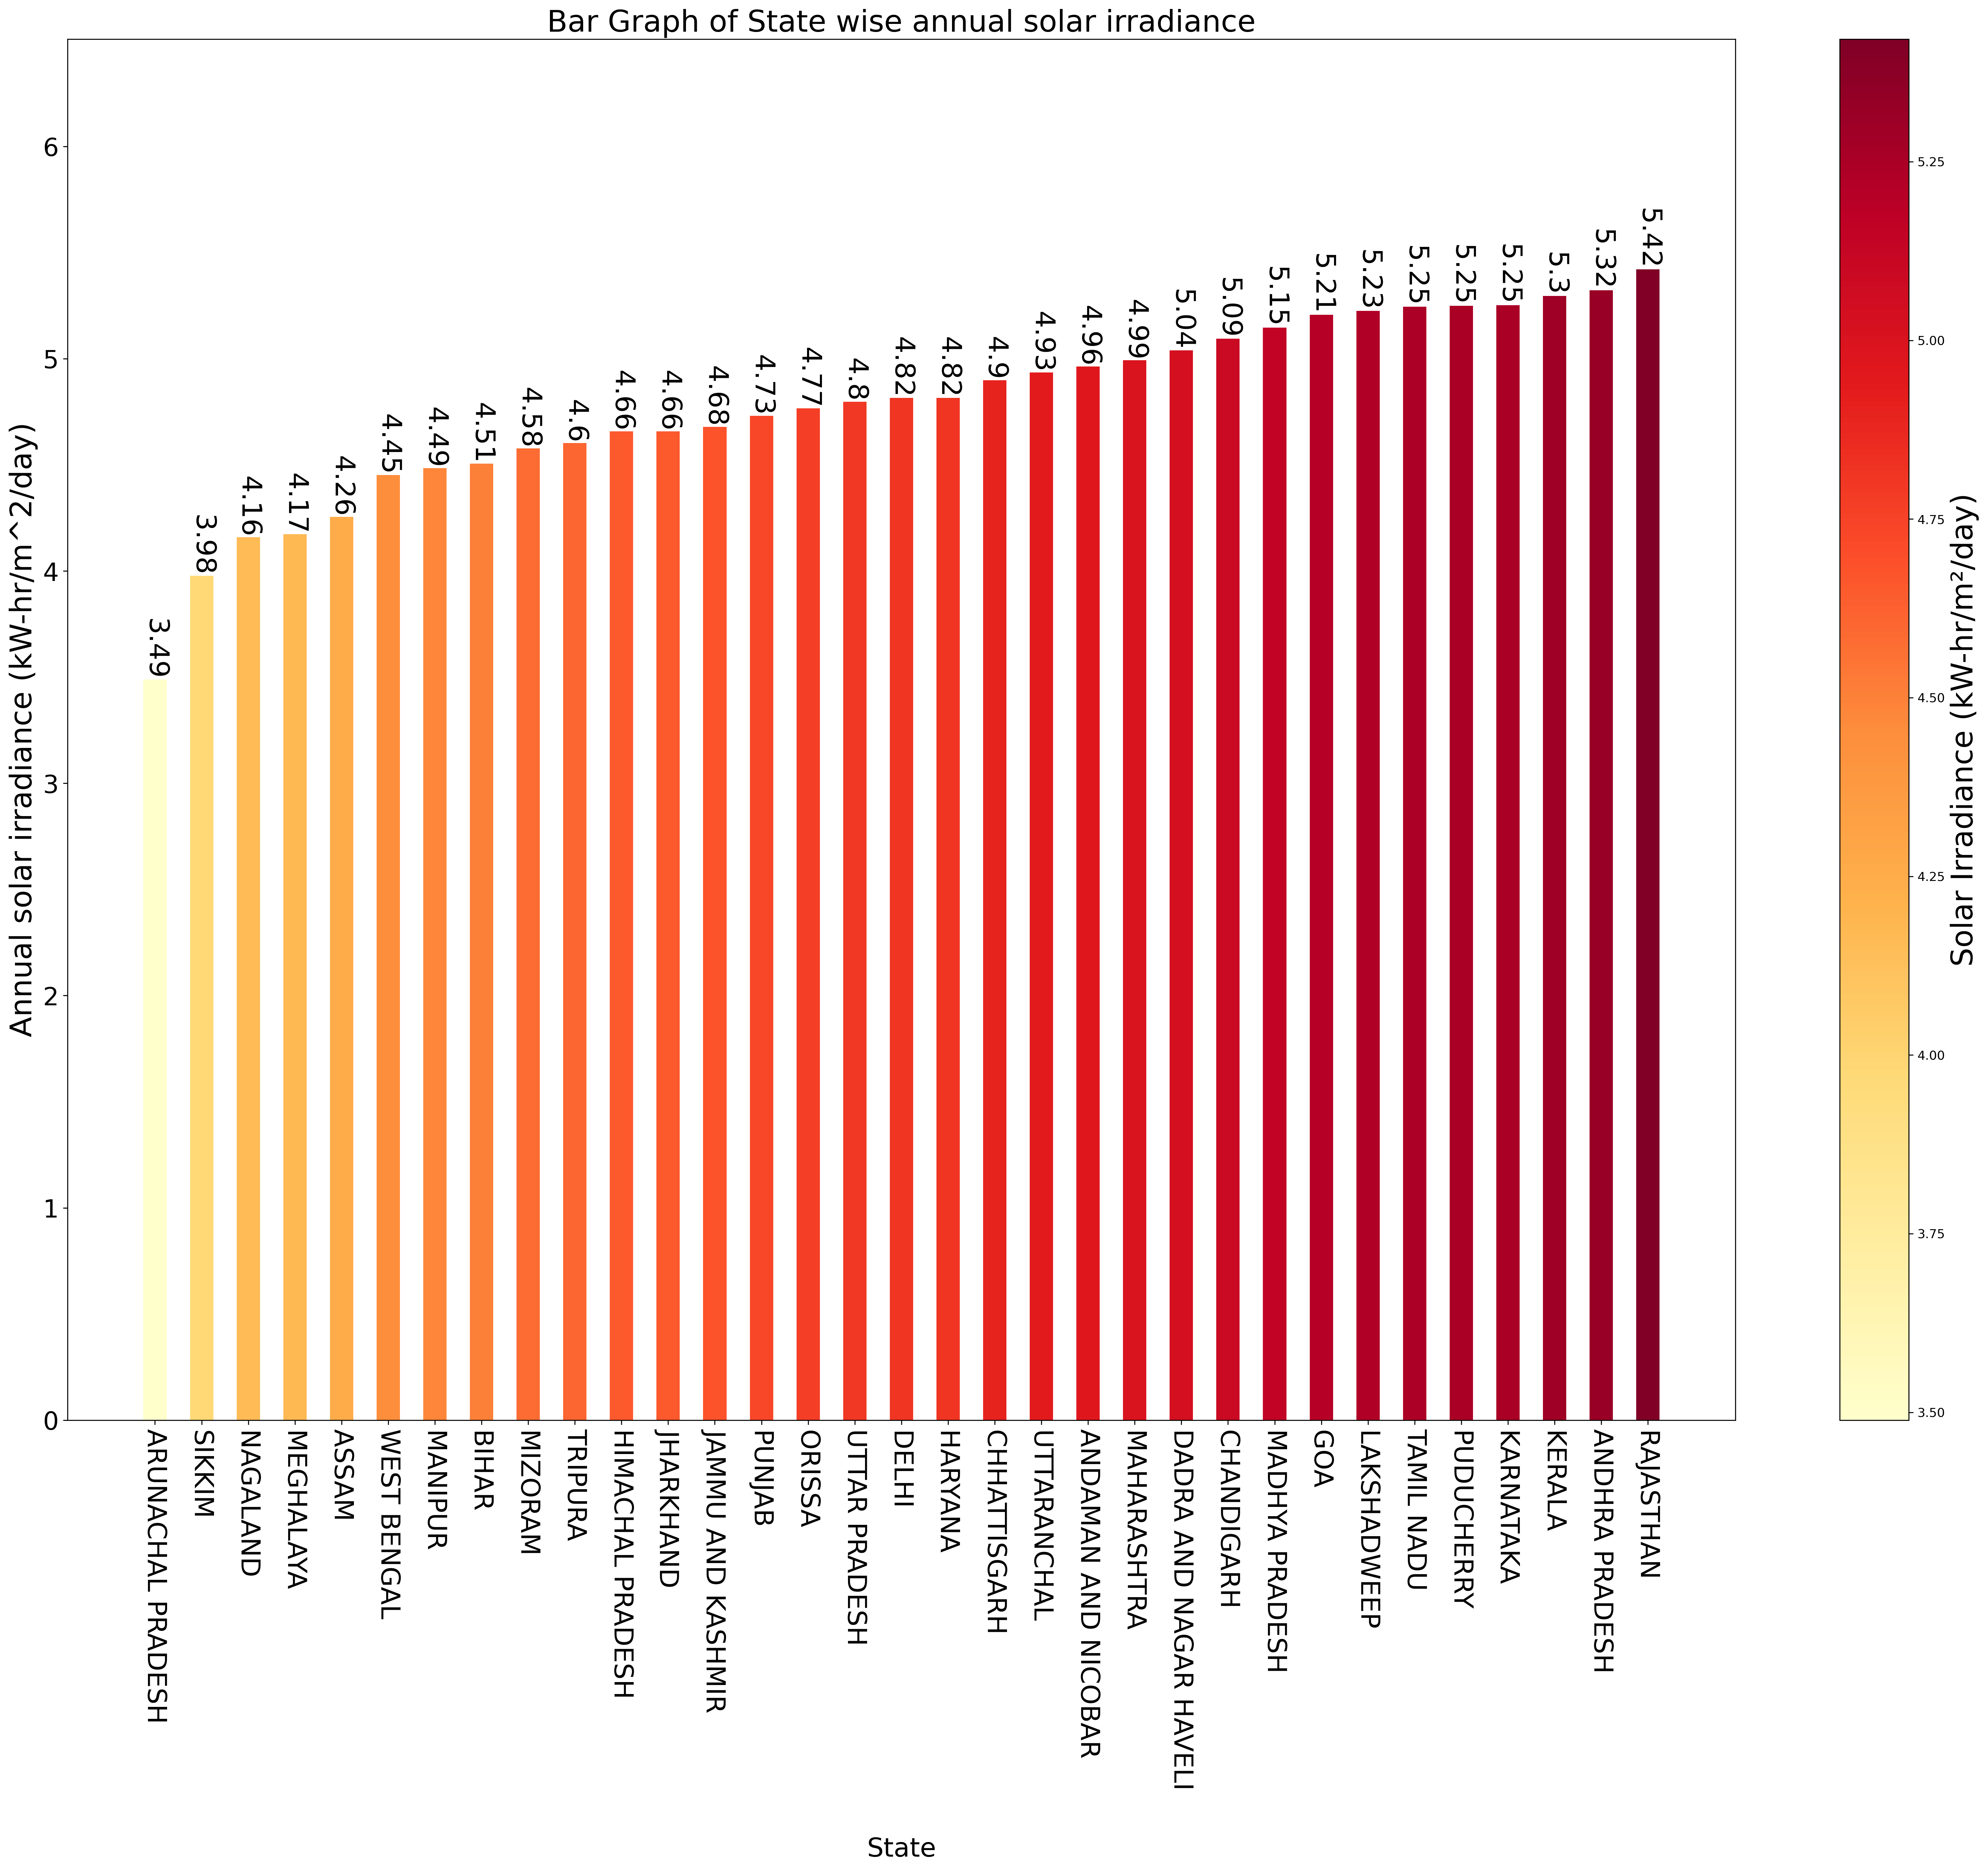

In [55]:
# color gradient
norm = plt.Normalize(df_sorted_annual['Annual'].min(), df_sorted_annual['Annual'].max())
colors = cm.YlOrRd(norm(df_sorted_annual['Annual']))

positions = np.arange(len(df_sorted_annual)) * 2

fig, ax = plt.subplots(figsize=(30, 20), dpi=300)  # Adjust the figure size as needed
bars = ax.bar(positions, df_sorted_annual['Annual'], color=colors, width=1)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', rotation=-90, fontsize=22)

# Adding a color bar
sm = plt.cm.ScalarMappable(cmap=cm.YlOrRd, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Solar Irradiance (kW-hr/m²/day)', fontsize=24)

ax.set_xlabel('State', fontsize=21)  # Label for the x-axis
ax.set_ylabel('Annual solar irradiance (kW-hr/m^2/day)', fontsize=24)  # Label for the y-axis
ax.set_title('Bar Graph of State wise annual solar irradiance', fontsize=24)  # Title of the graph
ax.set_ylim(0, max(df_sorted_annual['Annual']) * 1.2)  # Adjust y-axis limits for better visibility
ax.set_xticks(positions)
ax.set_xticklabels(df_sorted_annual['States'], rotation=-90, fontsize=21)
ax.tick_params(axis='y', labelsize=20)

plt.show()

## Plotting the data seasonally

In [64]:
winter_months = ["Dec", "Jan", "Feb", "Mar", "Apr"]
summer_months = ["May", "Jun", "Jul"]
monsoon_months = ["Jul", "Aug", "Sept"]
post_monsoon_months = ["Oct", "Nov"]

### 1. Winter

C:\temp\ipykernel_3976\1632226475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  winter_data['mean_irradiance'] = winter_data[winter_months].mean(axis=1)


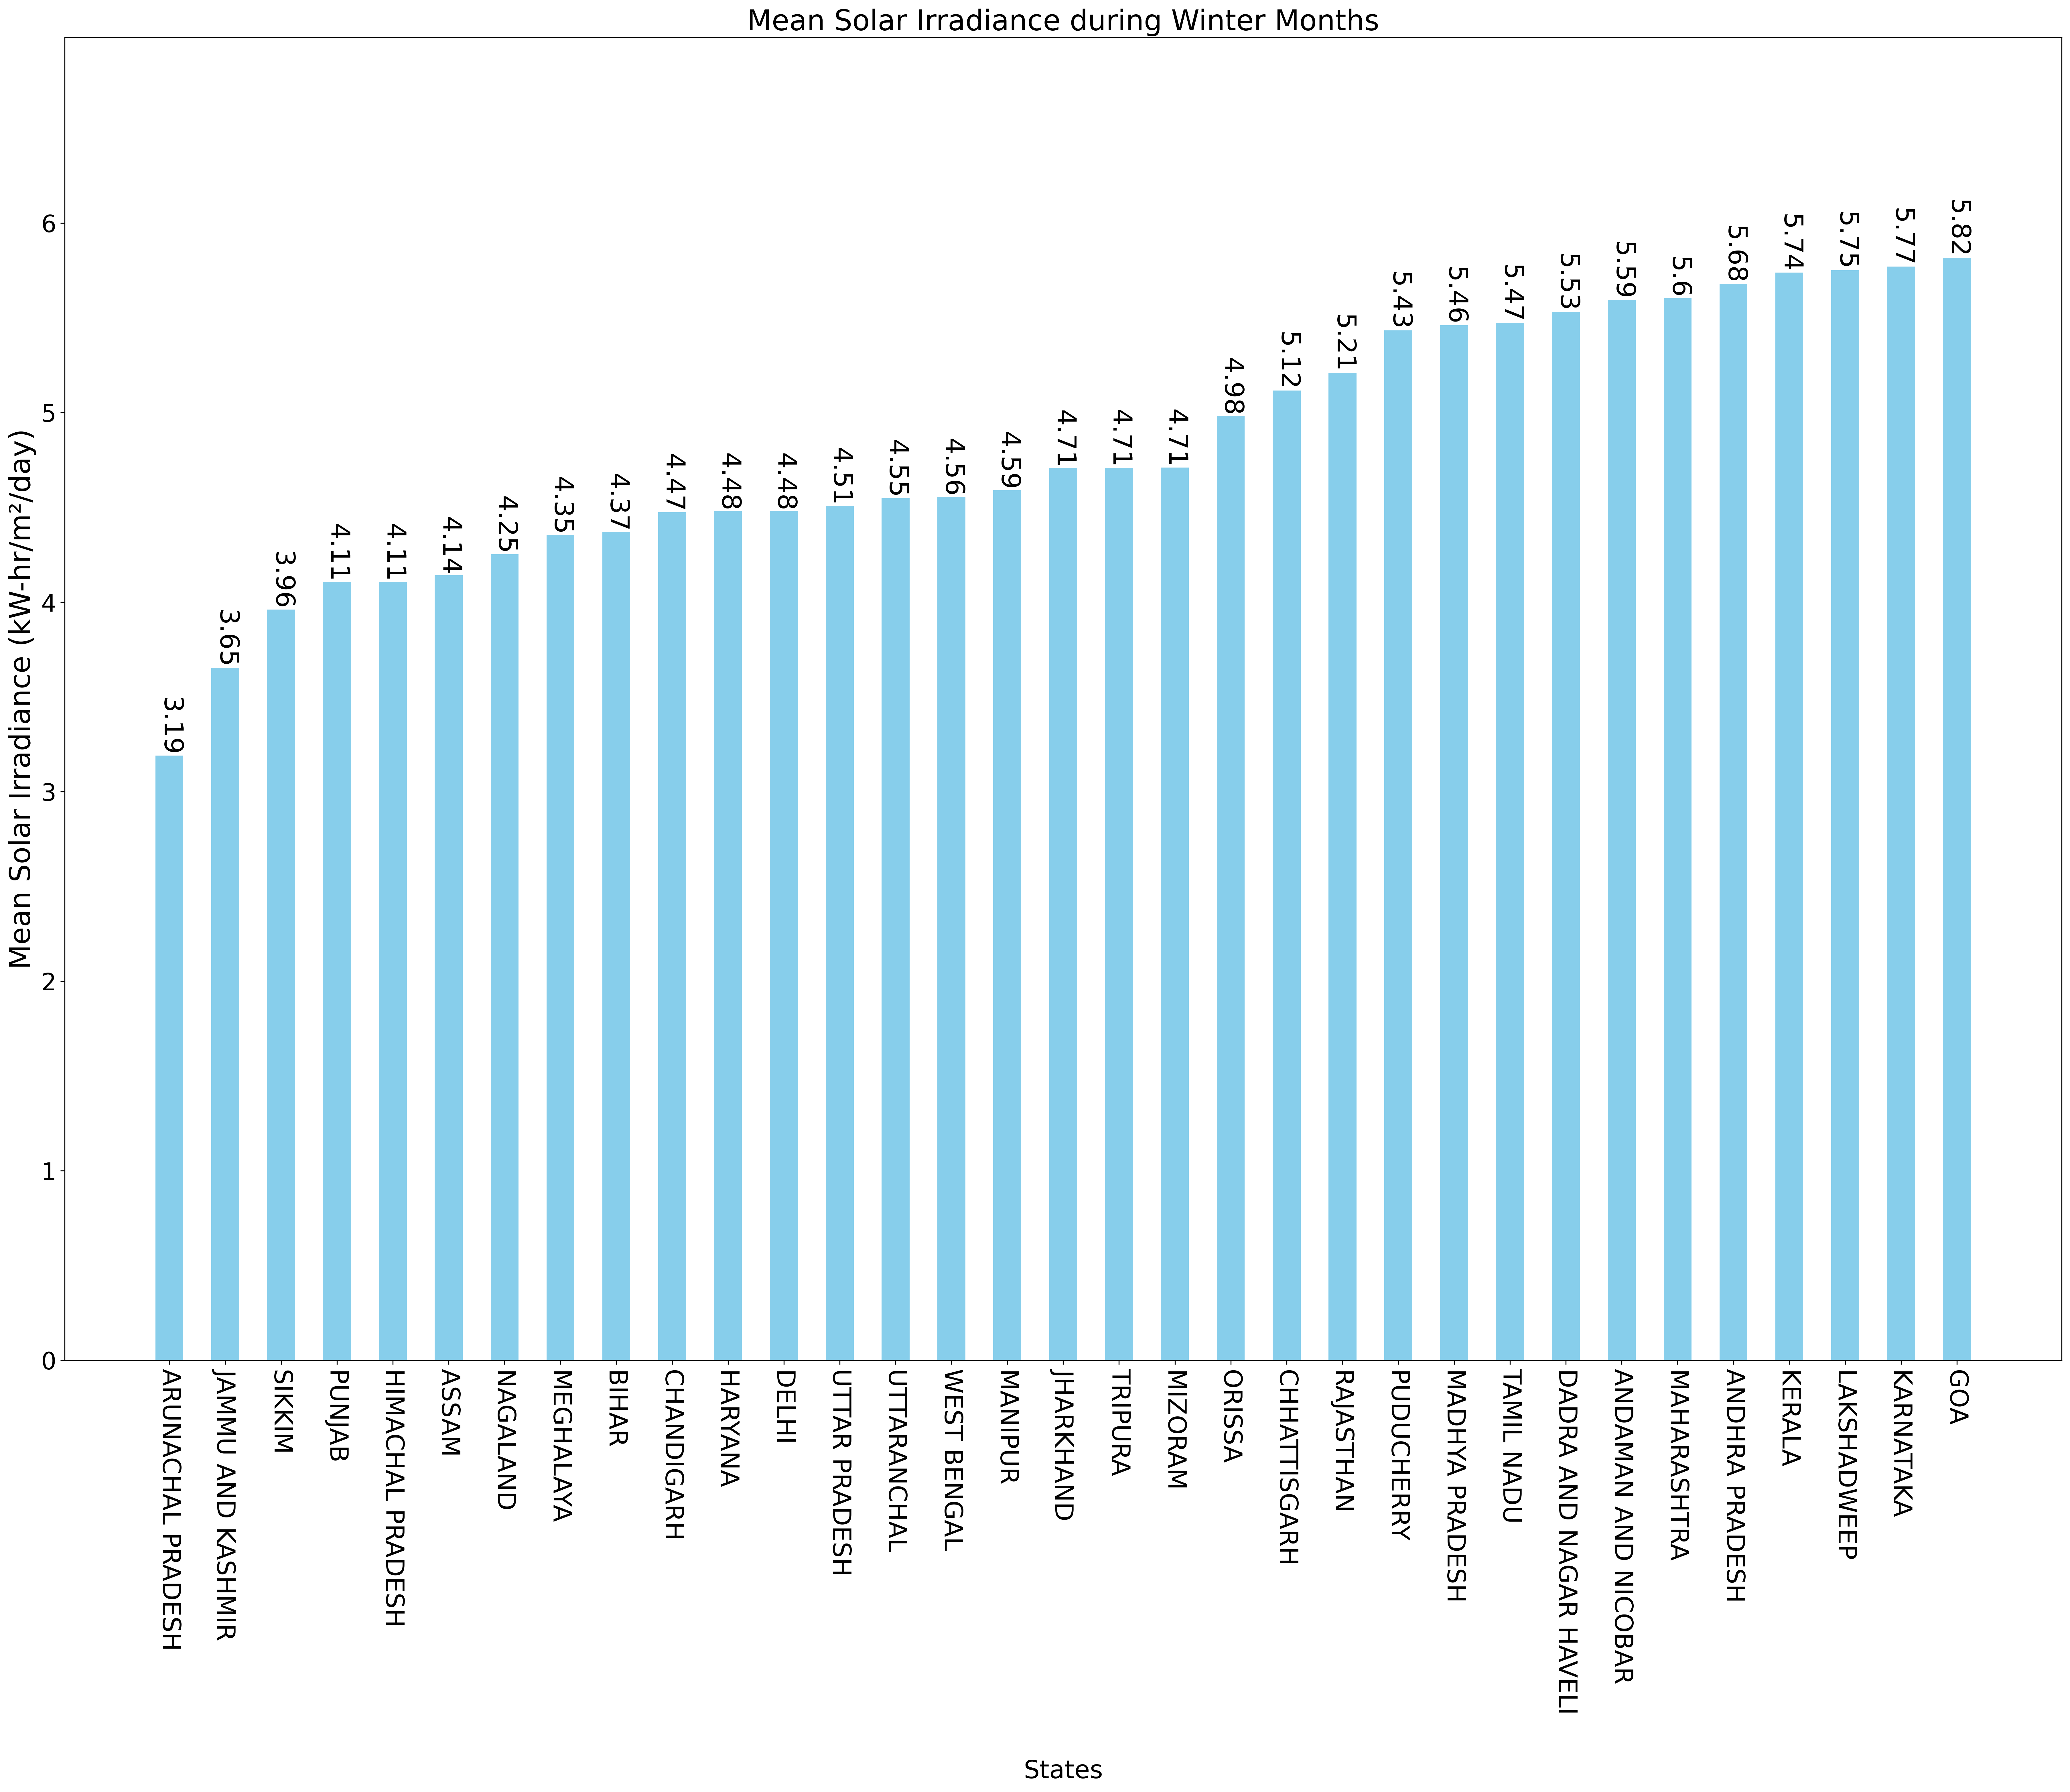

In [68]:
winter_data = df_sorted_annual[["States"] + winter_months]
winter_data['mean_irradiance'] = winter_data[winter_months].mean(axis=1)

winter_data = winter_data.sort_values(by = 'mean_irradiance')
fig, ax = plt.subplots(figsize=(30, 20), dpi=300)  # Adjust the figure size as needed
bars = ax.bar(positions, winter_data['mean_irradiance'], color='skyblue', width=1)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', rotation=-90, fontsize=22)



ax.set_xlabel('States', fontsize=21)  # Label for the x-axis
ax.set_ylabel('Mean Solar Irradiance (kW-hr/m²/day)', fontsize=24)  # Label for the y-axis
ax.set_title('Mean Solar Irradiance during Winter Months', fontsize=24)  # Title of the graph
ax.set_ylim(0, max(winter_data['mean_irradiance']) * 1.2)  # Adjust y-axis limits for better visibility
ax.set_xticks(positions)
ax.set_xticklabels(winter_data['States'], rotation=-90, fontsize=21)
ax.tick_params(axis='y', labelsize=20)

plt.show()

### 2. Summer

C:\temp\ipykernel_3976\424211981.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_data['mean_irradiance'] = summer_data[summer_months].mean(axis=1)


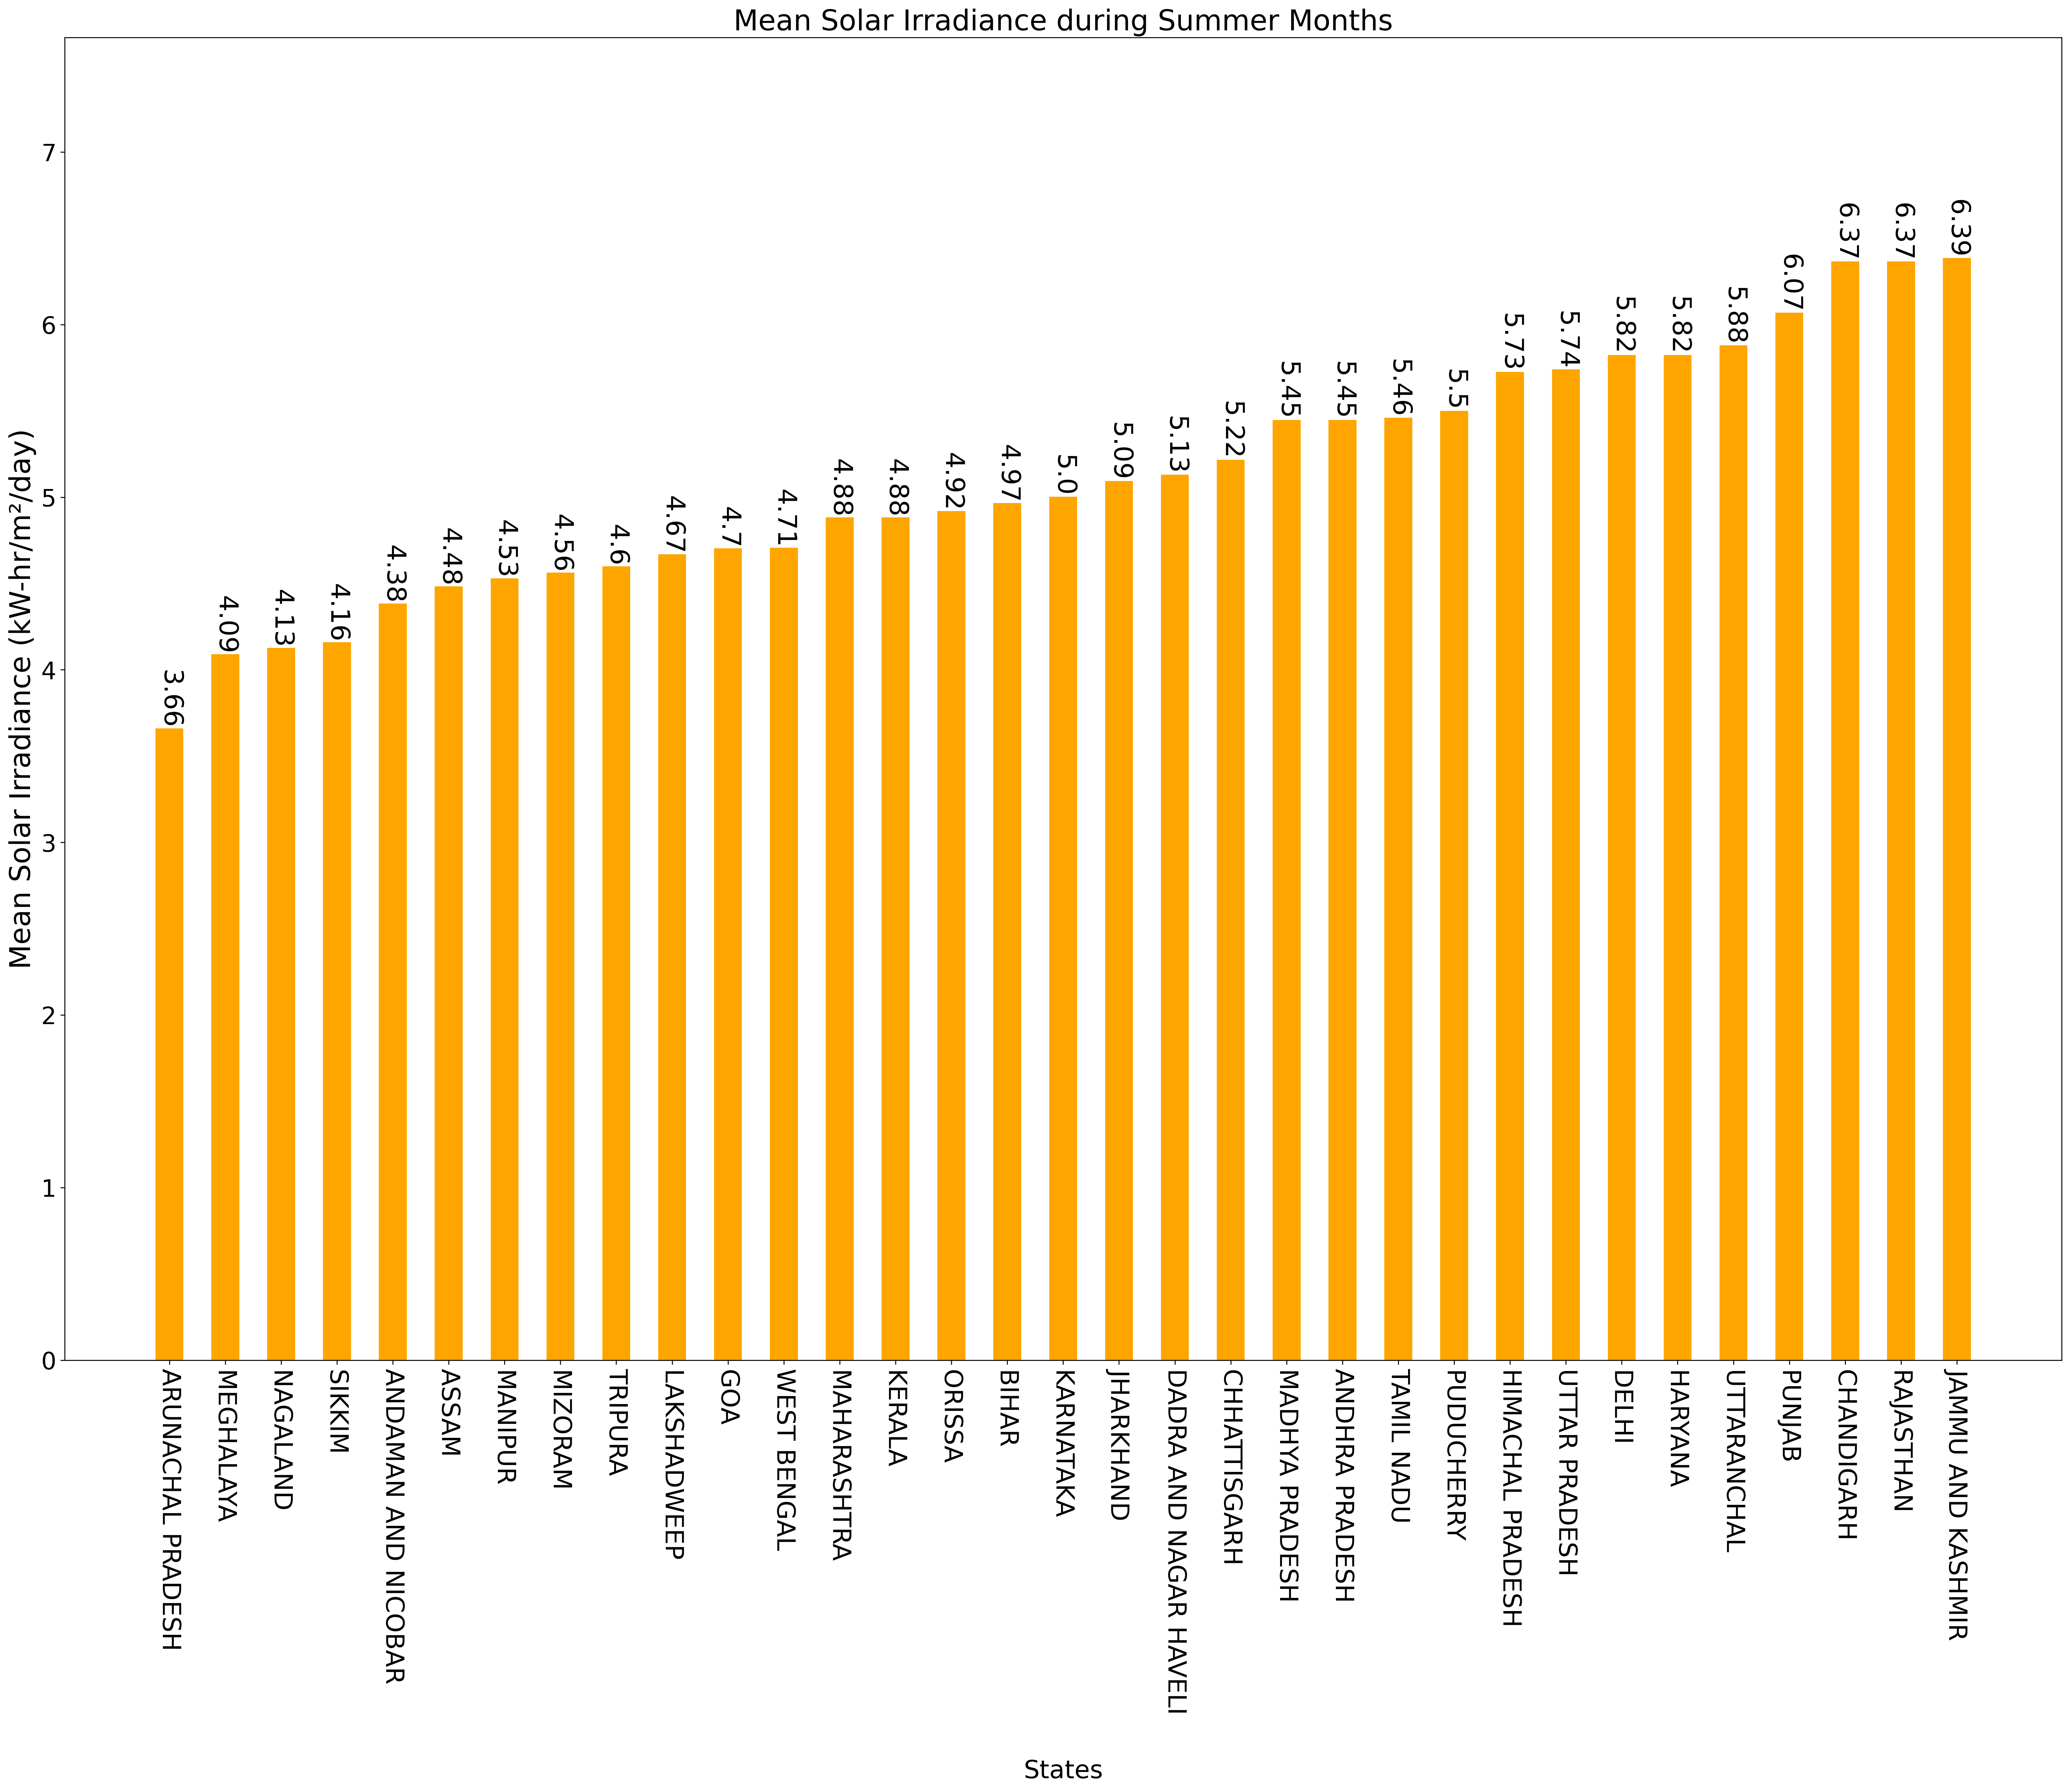

In [69]:
summer_data = df_sorted_annual[["States"] + summer_months]
summer_data['mean_irradiance'] = summer_data[summer_months].mean(axis=1)

summer_data = summer_data.sort_values(by = 'mean_irradiance')
fig, ax = plt.subplots(figsize=(30, 20), dpi=300)  # Adjust the figure size as needed
bars = ax.bar(positions, summer_data['mean_irradiance'], color='orange', width=1)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', rotation=-90, fontsize=22)



ax.set_xlabel('States', fontsize=21)  # Label for the x-axis
ax.set_ylabel('Mean Solar Irradiance (kW-hr/m²/day)', fontsize=24)  # Label for the y-axis
ax.set_title('Mean Solar Irradiance during Summer Months', fontsize=24)  # Title of the graph
ax.set_ylim(0, max(summer_data['mean_irradiance']) * 1.2)  # Adjust y-axis limits for better visibility
ax.set_xticks(positions)
ax.set_xticklabels(summer_data['States'], rotation=-90, fontsize=21)
ax.tick_params(axis='y', labelsize=20)

plt.show()

### 3. Monsoon

C:\temp\ipykernel_3976\1952188033.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monsoon_data['mean_irradiance'] = monsoon_data[monsoon_months].mean(axis=1)


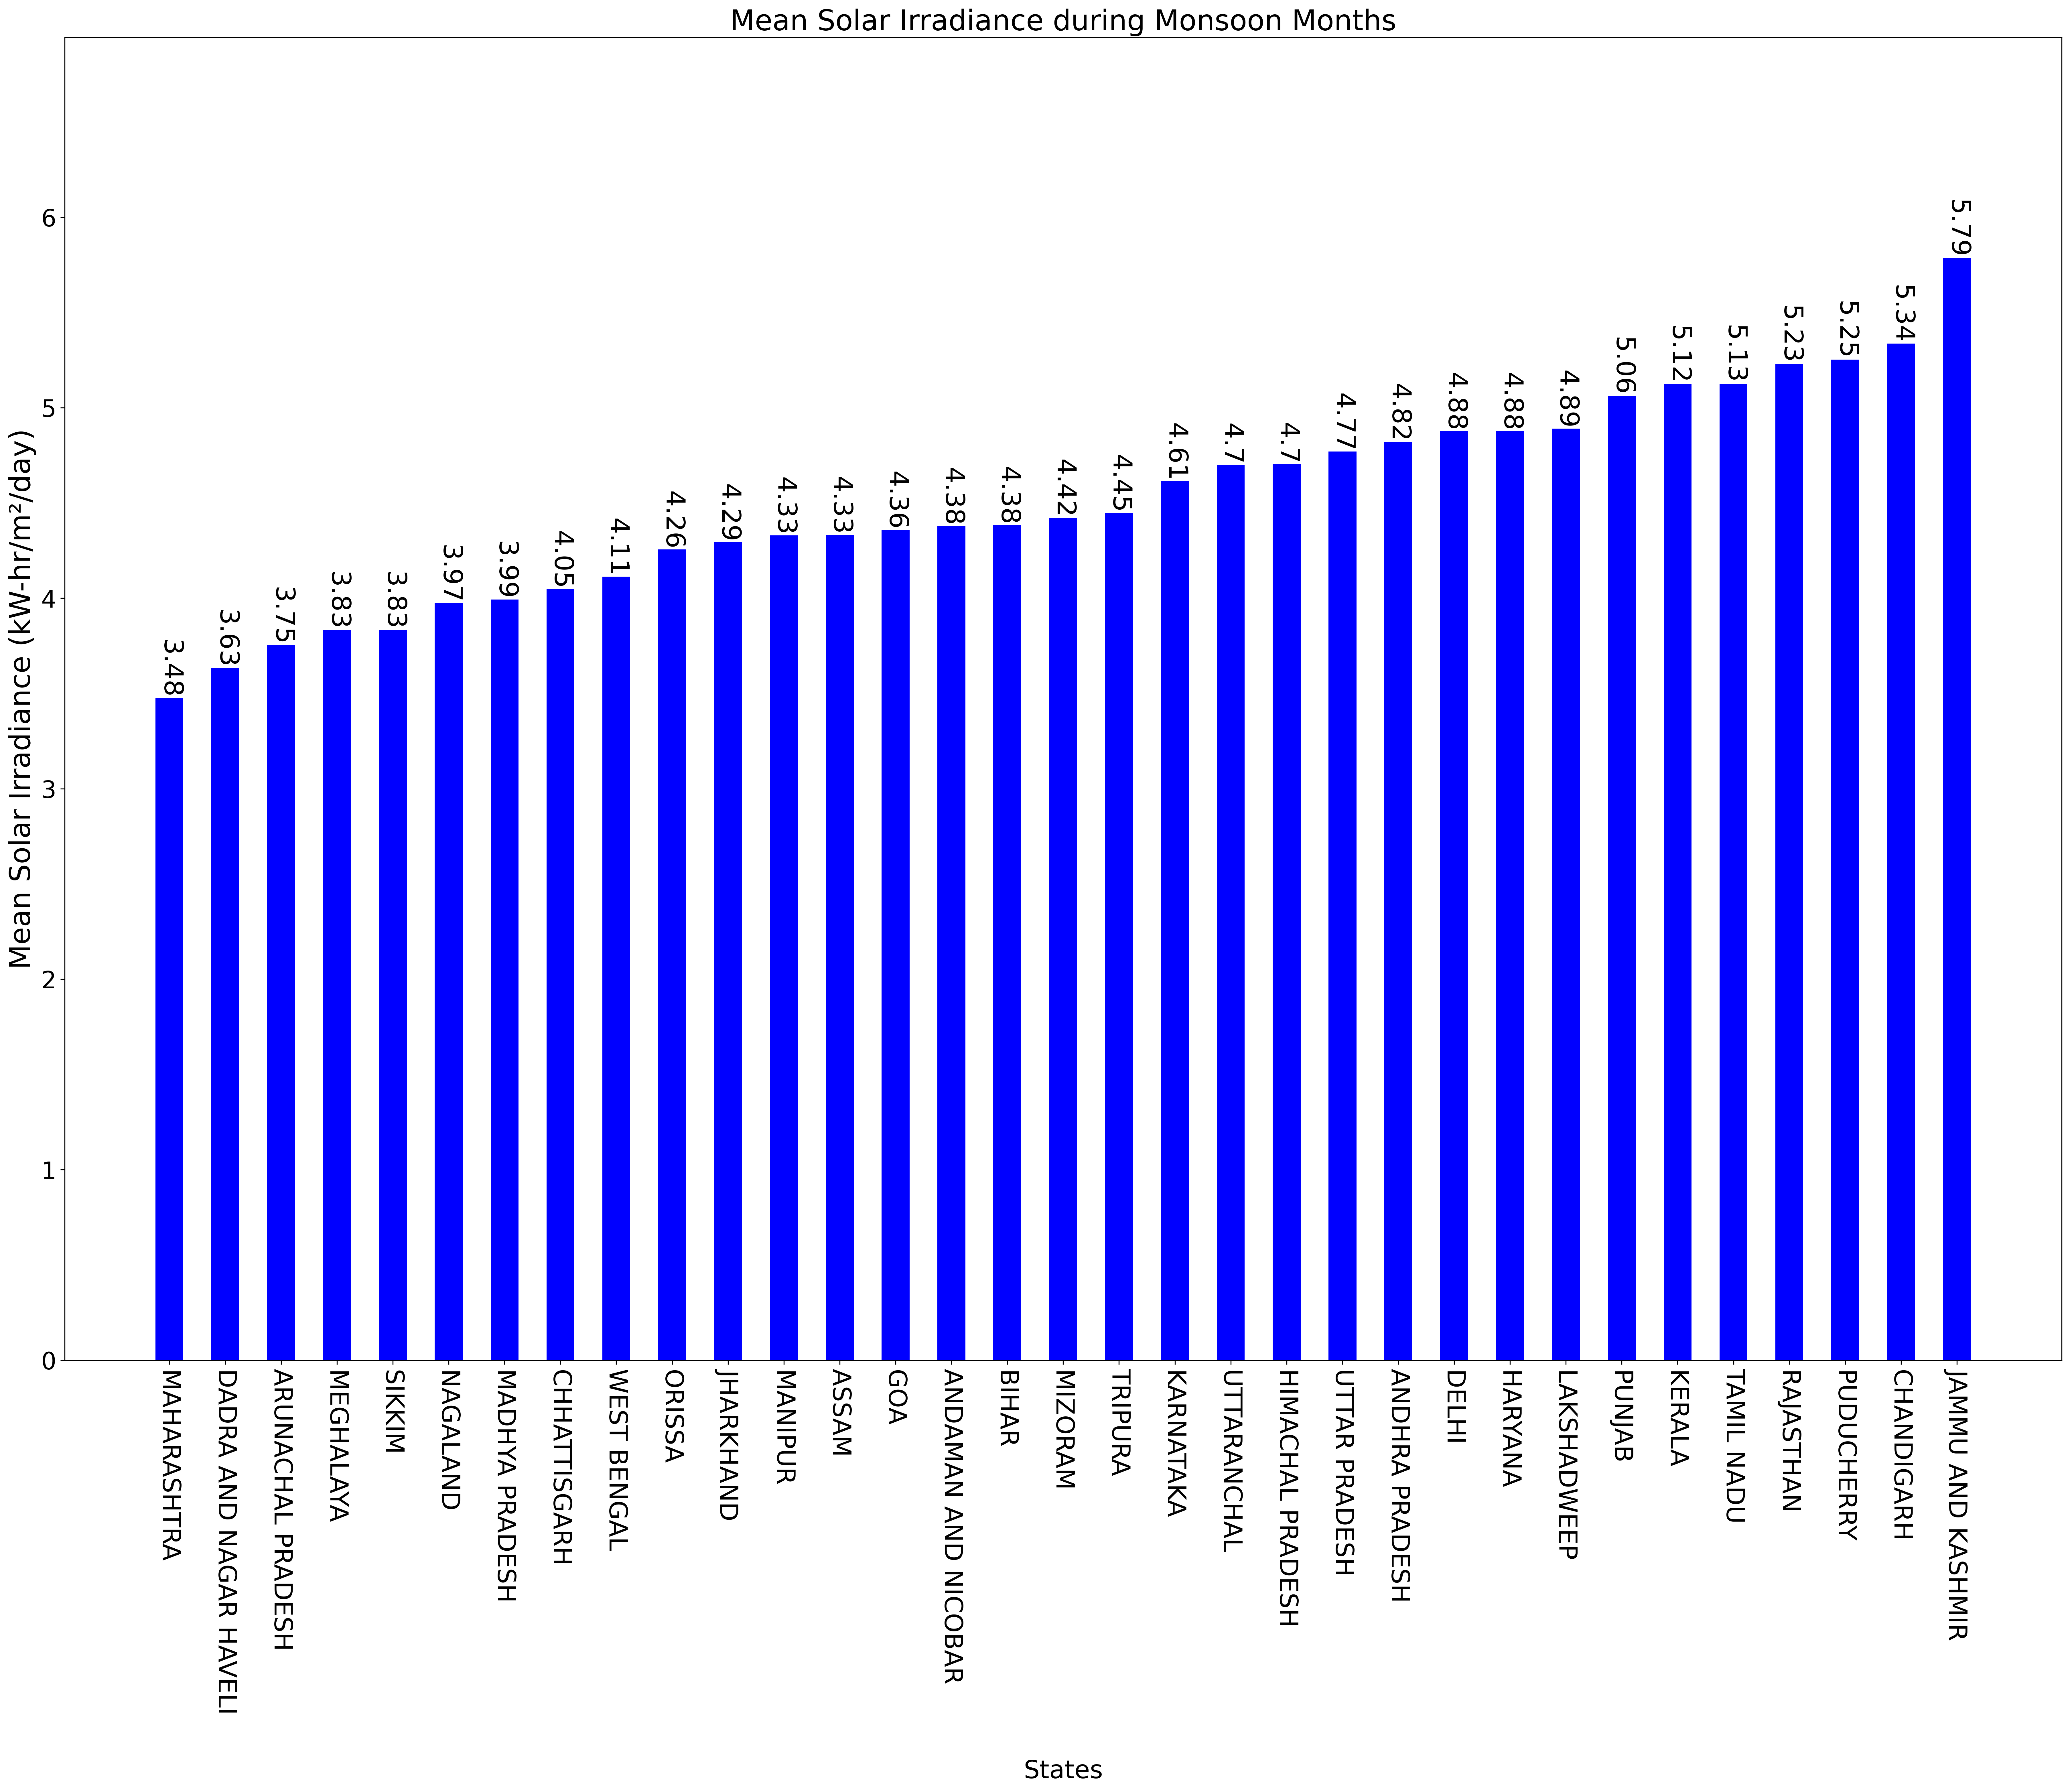

In [70]:
monsoon_data = df_sorted_annual[["States"] + monsoon_months]
monsoon_data['mean_irradiance'] = monsoon_data[monsoon_months].mean(axis=1)

monsoon_data = monsoon_data.sort_values(by = 'mean_irradiance')
fig, ax = plt.subplots(figsize=(30, 20), dpi=300)  # Adjust the figure size as needed
bars = ax.bar(positions, monsoon_data['mean_irradiance'], color='blue', width=1)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', rotation=-90, fontsize=22)



ax.set_xlabel('States', fontsize=21)  # Label for the x-axis
ax.set_ylabel('Mean Solar Irradiance (kW-hr/m²/day)', fontsize=24)  # Label for the y-axis
ax.set_title('Mean Solar Irradiance during Monsoon Months', fontsize=24)  # Title of the graph
ax.set_ylim(0, max(monsoon_data['mean_irradiance']) * 1.2)  # Adjust y-axis limits for better visibility
ax.set_xticks(positions)
ax.set_xticklabels(monsoon_data['States'], rotation=-90, fontsize=21)
ax.tick_params(axis='y', labelsize=20)

plt.show()

### 4. Post monsoon

C:\temp\ipykernel_3976\3284413563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_monsoon_data['mean_irradiance'] = post_monsoon_data[post_monsoon_months].mean(axis=1)


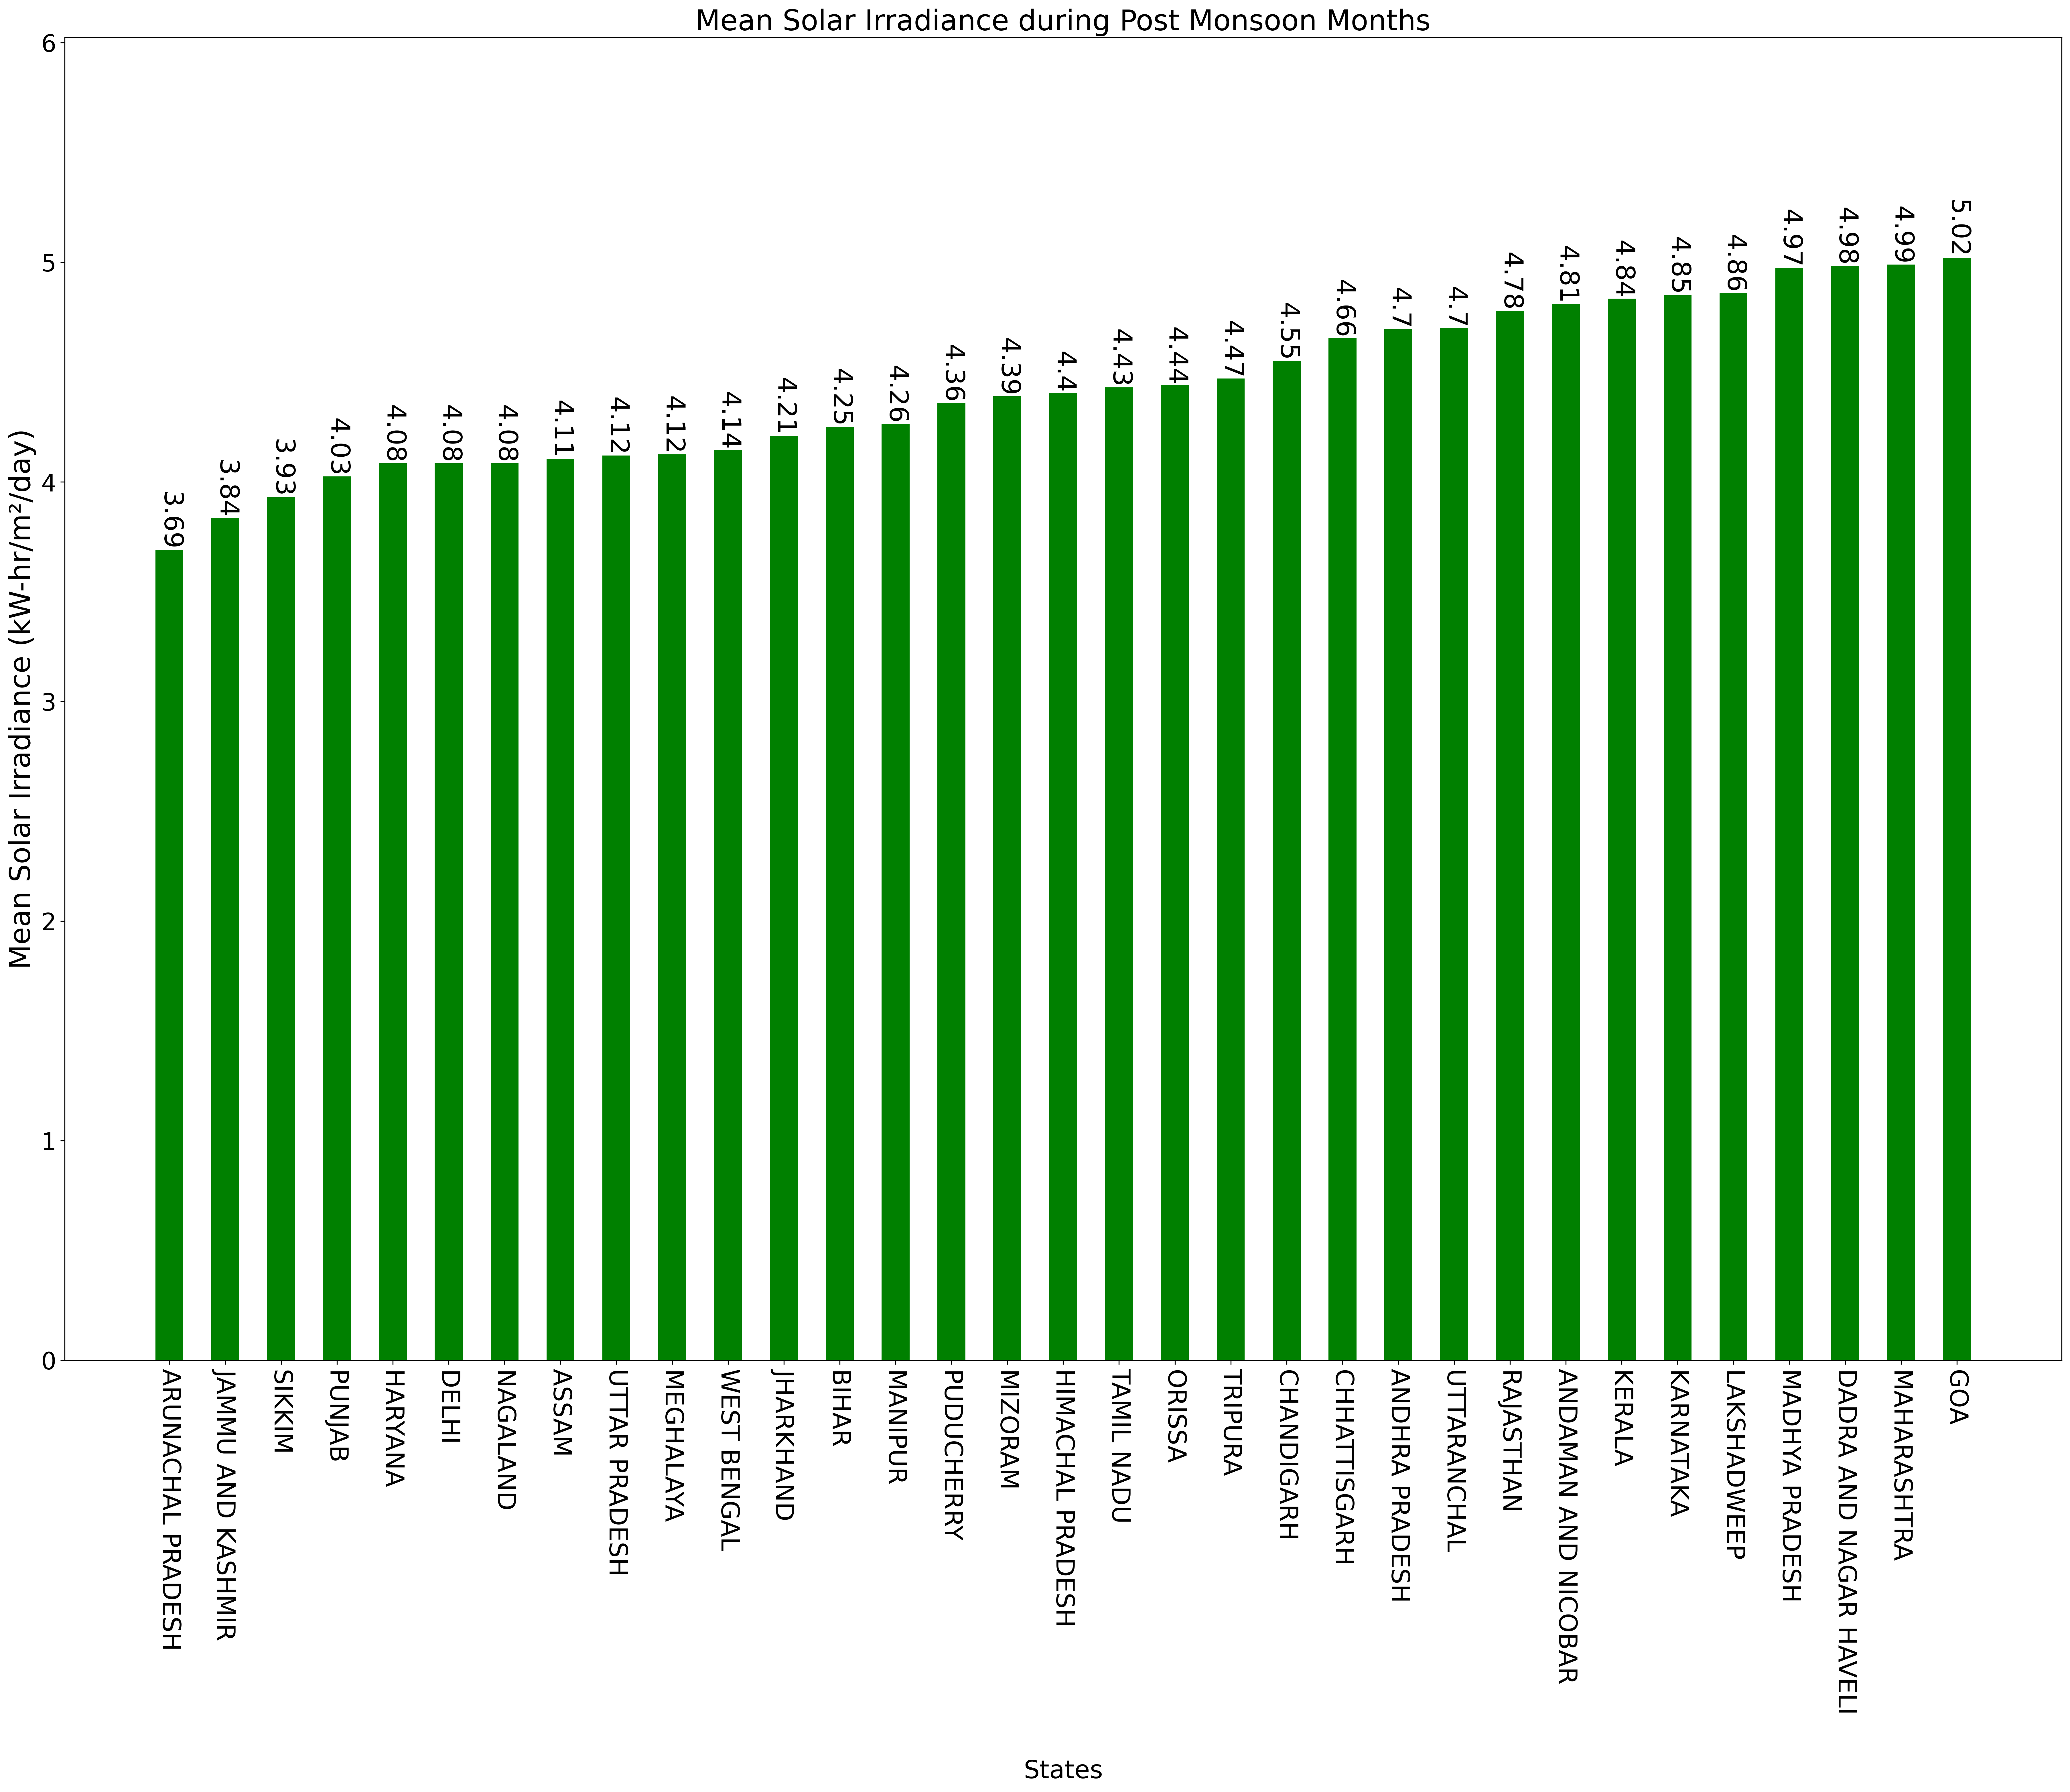

In [71]:
post_monsoon_data = df_sorted_annual[["States"] + post_monsoon_months]
post_monsoon_data['mean_irradiance'] = post_monsoon_data[post_monsoon_months].mean(axis=1)

post_monsoon_data = post_monsoon_data.sort_values(by = 'mean_irradiance')
fig, ax = plt.subplots(figsize=(30, 20), dpi=300)  # Adjust the figure size as needed
bars = ax.bar(positions, post_monsoon_data['mean_irradiance'], color='green', width=1)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', rotation=-90, fontsize=22)



ax.set_xlabel('States', fontsize=21)  # Label for the x-axis
ax.set_ylabel('Mean Solar Irradiance (kW-hr/m²/day)', fontsize=24)  # Label for the y-axis
ax.set_title('Mean Solar Irradiance during Post Monsoon Months', fontsize=24)  # Title of the graph
ax.set_ylim(0, max(post_monsoon_data['mean_irradiance']) * 1.2)  # Adjust y-axis limits for better visibility
ax.set_xticks(positions)
ax.set_xticklabels(post_monsoon_data['States'], rotation=-90, fontsize=21)
ax.tick_params(axis='y', labelsize=20)

plt.show()